# [Pandas-Visualization](http://pandas.pydata.org/)

Pandas has a rich set of built-in visualizations that are based on [matplotlib](http://matplotlib.org/), an old but de factor standard for plotting and visualization in Python.

In addition to the built-in visualizations, almost all Python visualization packages, such as [seaborn](https://stanford.edu/~mwaskom/software/seaborn/) and [bokeh](http://bokeh.pydata.org/en/latest/), can work directly with Pandas data structures. 

In this notebook, I demonstrate some of the built-in visualization tools.

In [1]:
% matplotlib inline

In [2]:
import os
import sqlite3 as sqlite
import time
DATADIR = os.path.join("..", "Resources")

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
elevationA = pd.read_table(os.path.join("../", "Resources","elevation2.txt"),
                           thousands=",",index_col='State')

In [6]:
elevationA

,Unnamed: 0,Rank,Highest elevation,Lowest elevation,Average elevation
State,,,,,
Colorado,0,1,14440,3315,6800
Wyoming,1,2,13804,3099,6700
Utah,2,3,13528,2000,6100
New Mexico,3,4,13161,2842,5700
Nevada,4,5,13140,479,5500
Idaho,5,6,12662,710,5000
Arizona,6,7,12633,70,4100
Montana,7,8,12799,1800,3400
Oregon,8,9,11239,0,3300


### Basic line plot

In [7]:
print (elevationA['Highest elevation'])

State
Colorado          14440
Wyoming           13804
Utah              13528
New Mexico        13161
Nevada            13140
Idaho             12662
Arizona           12633
Montana           12799
Oregon            11239
Hawaii            13796
California        14494
Nebraska           5424
South Dakota       7242
Kansas             4039
Alaska            20320
North Dakota       3506
Washington        14410
Texas              8749
West Virginia      4863
Oklahoma           4973
Minnesota          2301
Pennsylvania       3213
Iowa               1670
Wisconsin          1951
New Hampshire      6288
New York           5344
Vermont            4393
Virginia           5729
Tennessee          6643
Michigan           1979
Ohio               1549
Missouri           1772
Kentucky           4139
North Carolina     6684
Indiana            1257
Arkansas           2753
Maine              5276
Georgia            4784
Illinois           1235
Massachusetts      3487
Alabama            2407
Connecticu

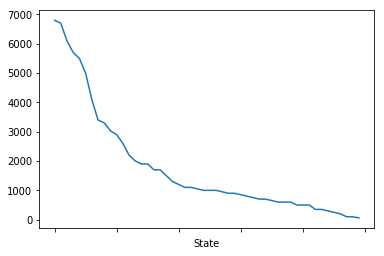

In [8]:
elevationA["Average elevation"].plot()

### Bar plot

In [21]:
import matplotlib 
matplotlib.rc('xtick', labelsize=8) 
matplotlib.rc('ytick', labelsize=12) 

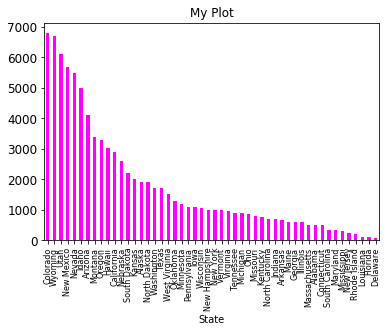

In [22]:
elevationA["Average elevation"].plot(kind="bar", color=(1,0,1), 
                                     title="My Plot", rot=90)

In [23]:
bp = pd.read_csv(os.path.join(DATADIR,"abp_all.csv"),
                 na_values=[]).dropna()
bp.head(20)

,Unnamed: 0,VALUE1NUM,VALUE1UOM,VALUE2NUM,VALUE2UOM
0,0,139.0,mmHg,46.0,mmHg
3,3,0.0,mmHg,0.0,mmHg
4,4,78.0,mmHg,49.0,mmHg
5,5,73.0,mmHg,47.0,mmHg
6,6,77.0,mmHg,51.0,mmHg
7,7,88.0,mmHg,54.0,mmHg
8,8,73.0,mmHg,43.0,mmHg
9,9,84.0,mmHg,53.0,mmHg
10,10,89.0,mmHg,57.0,mmHg
11,11,100.0,mmHg,60.0,mmHg


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd61a16b898>]], dtype=object)

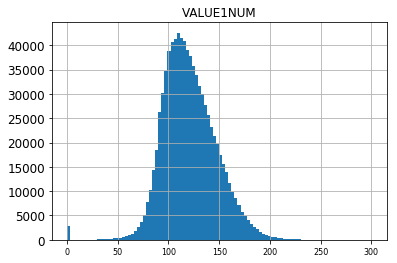

In [24]:
bp.hist(column=["VALUE1NUM"], bins=100)

## We can create numpy arrays from text data
### We can generate a data frame from numpy arrays

In [25]:
systolic = np.genfromtxt(os.path.join(DATADIR,"systolic.txt"),
                         delimiter=",")
diastolic = np.genfromtxt(os.path.join(DATADIR,"diastolic.txt"),
                         delimiter=",")

In [26]:
blood_pressure = pd.DataFrame.from_dict({'systolic':systolic,'diastolic':diastolic})
blood_pressure[(blood_pressure["diastolic"] > 10)| (blood_pressure["systolic"] > 10)]

,systolic,diastolic
0,139.0,46.0
2,78.0,49.0
3,73.0,47.0
4,77.0,51.0
5,88.0,54.0
6,73.0,43.0
7,84.0,53.0
8,89.0,57.0
9,100.0,60.0
10,123.0,66.0


In [27]:
blood_pressure = blood_pressure[blood_pressure != 0].dropna()

In [28]:
blood_pressure

,systolic,diastolic
0,139.0,46.0
2,78.0,49.0
3,73.0,47.0
4,77.0,51.0
5,88.0,54.0
6,73.0,43.0
7,84.0,53.0
8,89.0,57.0
9,100.0,60.0
10,123.0,66.0


### We can make histograms with ``plot()``

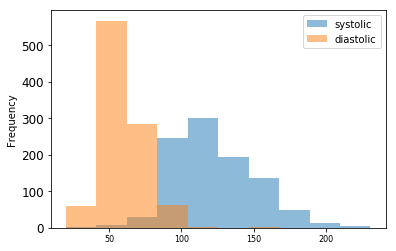

In [29]:
blood_pressure.plot(kind="hist", alpha=0.5)

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


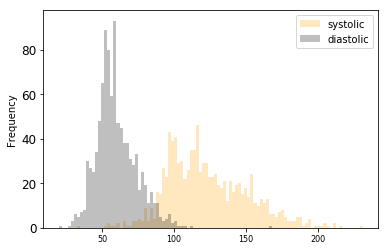

In [30]:
blood_pressure.plot(kind="hist", bins=100, 
                    colors = ["orange",'black'], alpha=0.25)

### Kernel-Density Estimates

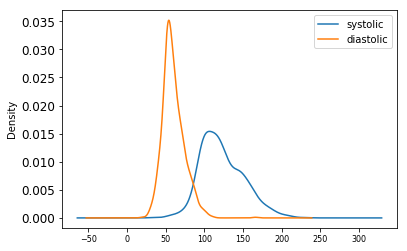

In [31]:
blood_pressure.plot(kind="kde")


### Box plots

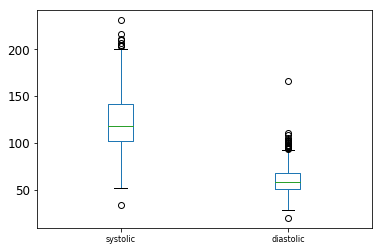

In [32]:
blood_pressure.plot(kind="box")

### Scatter plots

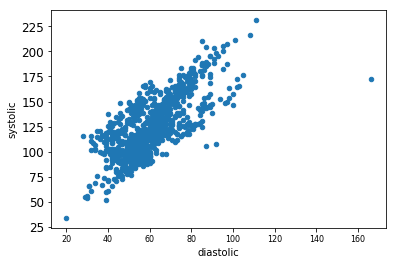

In [33]:
blood_pressure.plot(kind='scatter',x='diastolic',y='systolic')

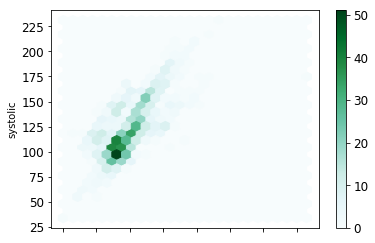

In [34]:
blood_pressure.plot(kind='hexbin',
                    x='diastolic',
                    y='systolic',
                   gridsize=25)

In [35]:
from pandas.tools.plotting import scatter_matrix

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd60df70f98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd60def96a0>]], dtype=object)

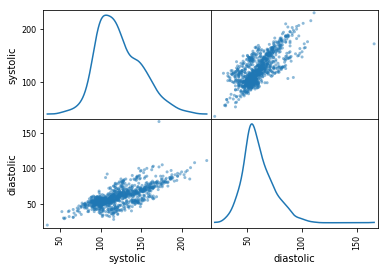

In [36]:
scatter_matrix(blood_pressure,diagonal='kde')